## Ovirani sesalec

Pripomba študentke na predavanju je bila povsem na mestu: kaj pa je sesalcu hudega, če se zaleti v steno? Nič. Pa tudi steni ne. Še več, sesalec na svoji življenjski (no: sesalni) poti naleti tudi na različne ovire. Pa mu tudi ni hudega.

Recimo, da je soba videti kot na spodnji sliki.

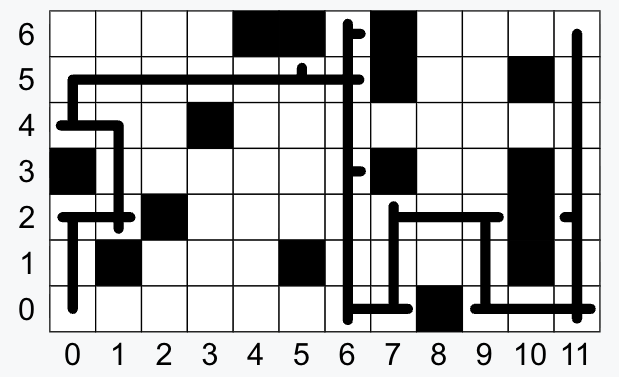

Široka je 12, visoka je 7, ovire pa so na koordinatah (0, 3), (1, 1), (2, 2) (3, 4) (4, 6) in tako naprej.

Mimogrede, sestavljalec robota menda še ni slišal za terke, zato je lokacije ovir opisal z dvema seznamoma, takole.

```
ovire_x = [0, 1, 2, 3, 4, 5, 5, 7, 7, 7, 8, 10, 10, 10, 10]
ovire_y = [3, 1, 2, 4, 6, 1, 6, 3, 5, 6, 0, 1, 2, 3, 5]
```

Na sliki je že vrisana tudi pot, ki jo prevozi sesalec, če sledi navodilu

```
pot = "^^<>>v^^<<^>>>>>^>>^>^vvv>vvvv>>^^^>>>vv<>>v>^^<^^^^"
```

Kadar ga premik vodi v steno ali oviro, pač ostane, kjer je.

## Obvezna naloga

Napišite funkcijo `sesalec(pot, sirina, visina, ovire_x, ovire_y)`, ki prejme pot (takšno, kot jo vidite zgoraj), širino, višino in koordinate ovir. Vrne končno pozicijo robota.

### Rešitev

Ovire bo potrebno zložiti v pare koordinat. To je pravzaprav tudi edino, v čemer se naloga razlikuje od nalog iz izpita, ki smo ga reševali na predavanju (2025/26). Hkrati pa je to ravno nekaj, kar smo stalno ponavljali na predavanju: oba seznama "zipnemo" v pare, nato pa ga s klicem `list` spremenimo v seznam, da bomo lahko iskali po njem.

No, pa še ena razlika v primerjavi z izpitom: namesto da bi spremenili koordinato (torej: spremenljivki `x` in `y`), raje izračunamo *potencialne* nove koordinate in preverimo, ali so dovoljene, preden spremenimo *dejanske* koordinate.

In [1]:
def sesalec(pot, sirina, visina, ovire_x, ovire_y):
    ovire = list(zip(ovire_x, ovire_y))
    x = y = 0
    for znak in pot:
        nx, ny = x, y
        if znak == "<":
            nx -= 1
        elif znak == ">":
            nx += 1
        elif znak == "^":
            ny += 1
        elif znak == "v":
            ny -= 1
        if 0 <= nx < sirina and 0 <= ny < visina and (nx, ny) not in ovire:
            x, y = nx, ny
    return x, y

## Dodatna naloga

Poldka je svojega sesalnega robota kupila na Temuju. Ta je malo ... poseben. Po treh trkih (v steno ali oviro) se izključi.

Napišite funkcijo `temu` z enakimi argumenti, ki vrne mesto, do katerega bo prilel ta, Temujev robot.

### Rešitev

Podobno kot prej, le robotove "buške" moramo šteti. Ko se naberejo tri, prekinemo zanko.

In [2]:
def temu(pot, sirina, visina, ovire_x, ovire_y):
    ovire = list(zip(ovire_x, ovire_y))
    x = y = 0
    buska = 0
    for znak in pot:
        nx, ny = x, y
        if znak == "<":
            nx -= 1
        elif znak == ">":
            nx += 1
        elif znak == "^":
            ny += 1
        elif znak == "v":
            ny -= 1
        if 0 <= nx < sirina and 0 <= ny < visina and (nx, ny) not in ovire:
            x, y = nx, ny
        else:
            buska += 1
            if buska == 3:
                break
    return x, y